In [228]:
import pandas as pd 

data = pd.read_csv(r"https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [229]:
data.shape

(1338, 7)

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [231]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [232]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [233]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [234]:
#TODO check for duplicates:
duplicates_all = data[data.duplicated(keep=False)]

print("Duplicates across all columns:")
print(duplicates_all)

Duplicates across all columns:
     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [235]:
data.drop_duplicates(subset=["age", "sex", "bmi", "children", "smoker", "region", "charges"], inplace=True)

In [236]:
data.shape

(1337, 7)

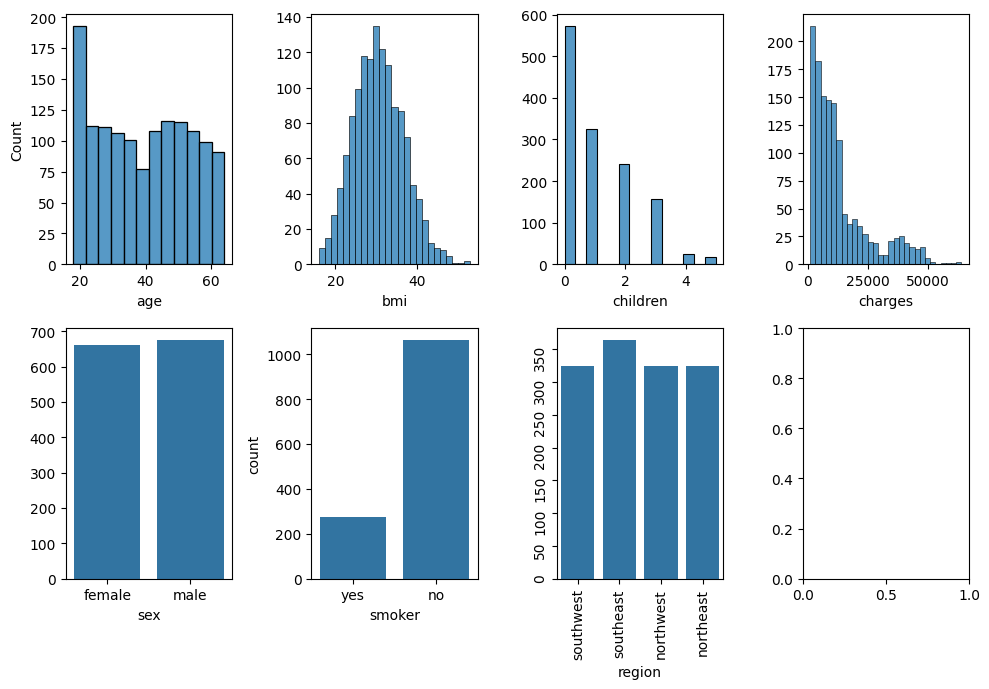

In [237]:
#TODO Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 4, figsize=(10, 7))

sns.histplot(ax=axis[0, 0], data=data, x="age")
sns.histplot(ax=axis[0, 1], data=data, x="bmi").set_ylabel(None)
sns.histplot(ax=axis[0, 2], data=data, x="children").set_ylabel(None)
sns.histplot(ax=axis[0, 3], data=data, x="charges").set_ylabel(None)

sns.countplot(ax=axis[1, 0], data=data, x="sex").set_ylabel(None)
sns.countplot(ax=axis[1, 1], data=data, x="smoker")
sns.countplot(ax=axis[1, 2], data=data, x="region").set_ylabel(None)
axis[1, 2].tick_params(rotation=90)


plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.show()

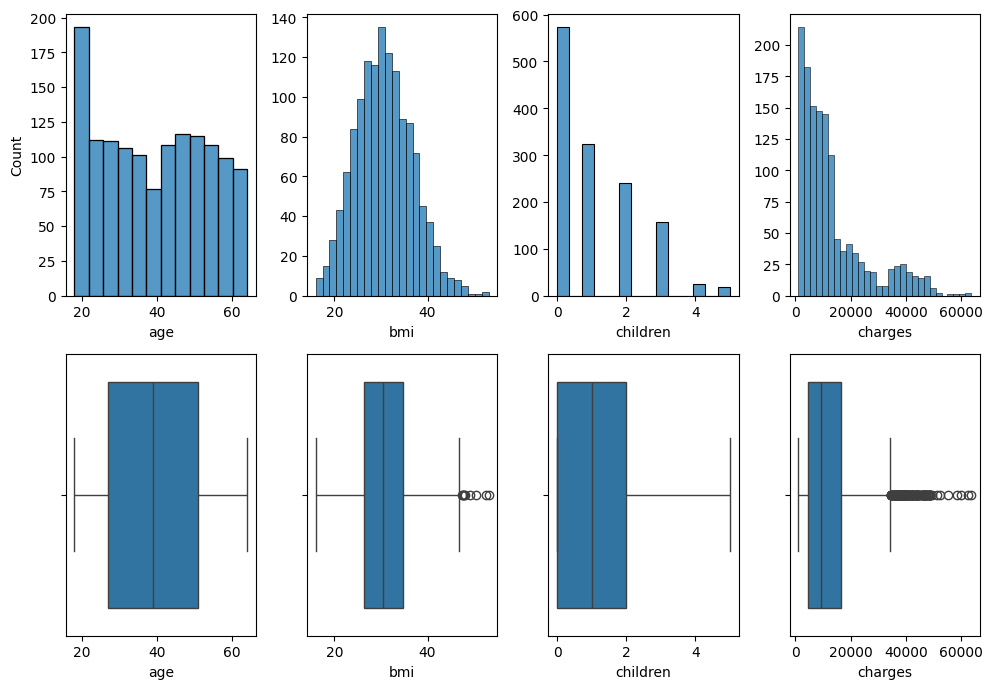

In [238]:
#TODO Numeric Analysis
fig, axis = plt.subplots(2, 4, figsize=(10, 7))

sns.histplot(ax=axis[0, 0], data=data, x="age")
sns.boxplot(ax=axis[1, 0], data=data, x="age")

sns.histplot(ax=axis[0, 1], data=data, x="bmi").set_ylabel(None)
sns.boxplot(ax=axis[1, 1], data=data, x="bmi")

sns.histplot(ax=axis[0, 2], data=data, x="children").set_ylabel(None)
sns.boxplot(ax=axis[1, 2], data=data, x="children")

sns.histplot(ax=axis[0, 3], data=data, x="charges").set_ylabel(None)
sns.boxplot(ax=axis[1, 3], data=data, x="charges")

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.show()

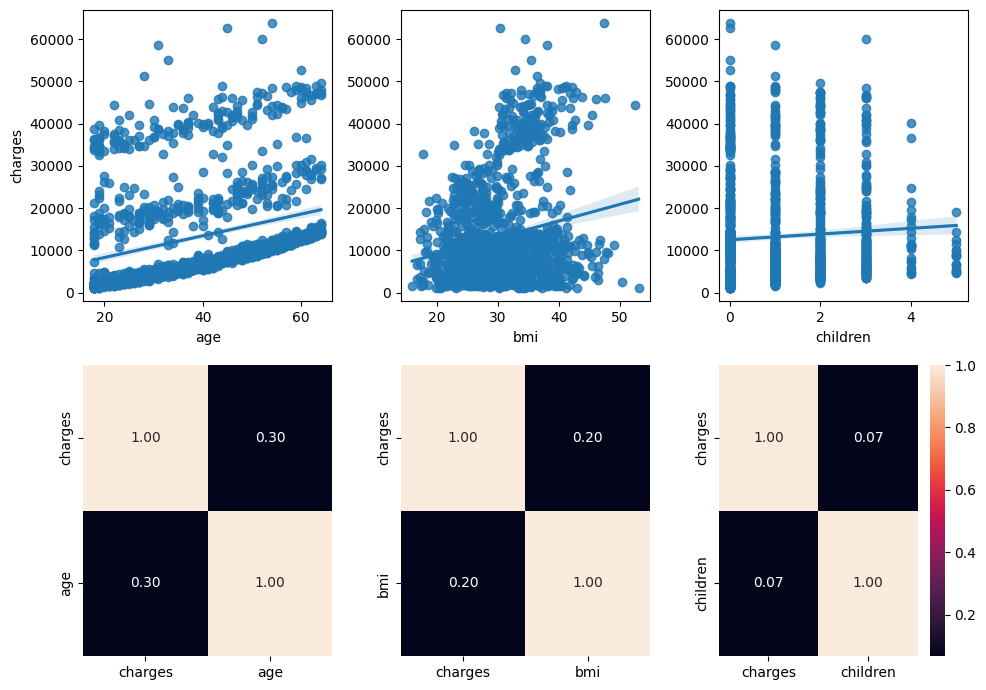

In [239]:
#TODO Numeric - Numeric Analysis
fig, axis = plt.subplots(2 ,3, figsize=(10, 7))

sns.regplot(ax=axis[0, 0], data=data, x="age", y="charges")
sns.heatmap(ax=axis[1, 0], data=data[["charges", "age"]].corr(), annot=True, fmt=".2f", cbar=False)

sns.regplot(ax=axis[0, 1], data=data, x="bmi", y="charges").set_ylabel(None)
sns.heatmap(ax=axis[1, 1], data=data[["charges", "bmi"]].corr(), annot=True, fmt=".2f", cbar=False)

sns.regplot(ax=axis[0, 2], data=data, x="children", y="charges").set_ylabel(None)
sns.heatmap(ax=axis[1, 2], data=data[["charges", "children"]].corr(), annot=True, fmt=".2f")

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.show()

In [240]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [241]:
#TODO Factorize
data["sex_n"] = pd.factorize(data["sex"])[0]
data["smoker_n"] = pd.factorize(data["smoker"])[0]
data["region_n"] = pd.factorize(data["region"])[0]

variable_num = ["age", "sex_n", "bmi", "children", "smoker_n", "region_n", "charges"]
data[variable_num].head()

,age,sex_n,bmi,children,smoker_n,region_n,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


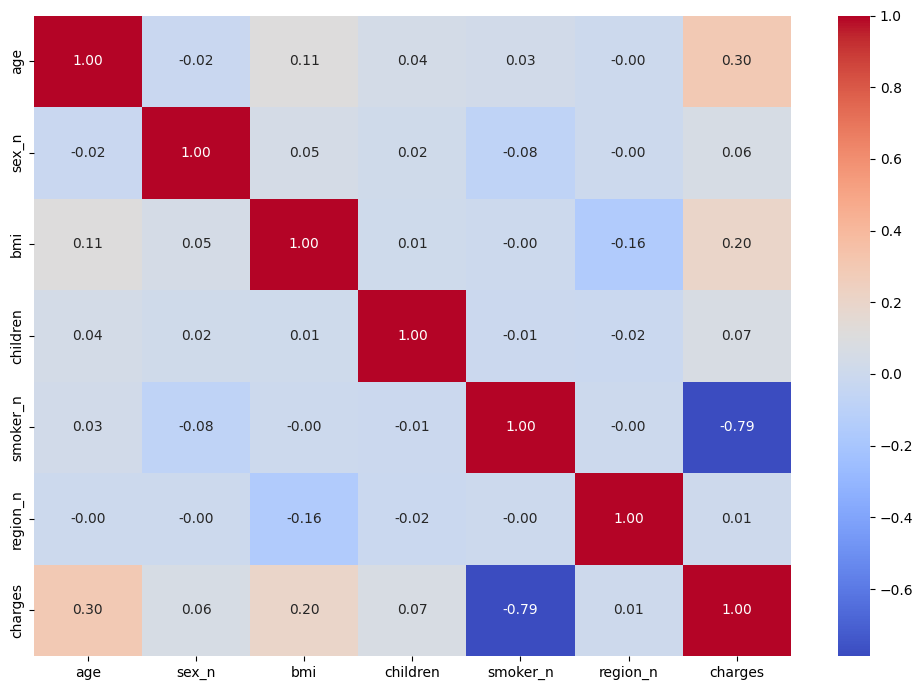

In [242]:
#TODO Correlation Heatmap
fig, axis = plt.subplots(figsize=(10, 7))

sns.heatmap(data=data[["age", "sex_n", "bmi", "children", "smoker_n", "region_n", "charges"]].corr(), annot=True, fmt=".2f", cmap="coolwarm")

plt.tight_layout()
plt.show()

               age     sex_n       bmi  children  smoker_n  region_n   charges
age       1.000000 -0.019814  0.109344  0.041536  0.025587 -0.001626  0.298308
sex_n    -0.019814  1.000000  0.046397  0.017848 -0.076596 -0.004936  0.058044
bmi       0.109344  0.046397  1.000000  0.012755 -0.003746 -0.157574  0.198401
children  0.041536  0.017848  0.012755  1.000000 -0.007331 -0.016258  0.067389
smoker_n  0.025587 -0.076596 -0.003746 -0.007331  1.000000 -0.002358 -0.787234
region_n -0.001626 -0.004936 -0.157574 -0.016258 -0.002358  1.000000  0.006547
charges   0.298308  0.058044  0.198401  0.067389 -0.787234  0.006547  1.000000


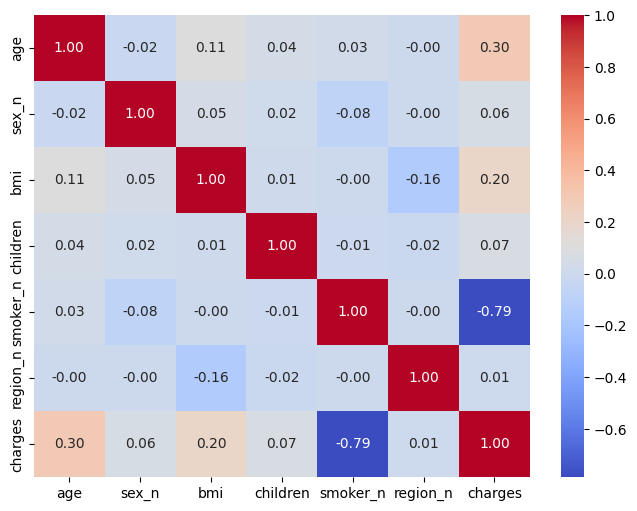

In [243]:
#TODO Multicollinearity Analysis
corr_matrix = data[variable_num].corr()
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

No need to remove any features. 
Charges top correlations: 
1. Smoker
2. Age
3. BMI

In [244]:
data.head()

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


In [245]:
#TODO One-Hot-Encode data
# Clearly define columns
numeric_cols = ["age", "bmi", "children"]
categorical_cols = ["sex", "smoker", "region"]
target_col = "charges"

encoded_data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [246]:
#TODO Split data
from sklearn.model_selection import train_test_split

X = encoded_data.drop([target_col], axis=1)
y = encoded_data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [247]:
#TODO Scale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Fit on training numeric columns
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Transform testing numeric columns
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [248]:
#TODO Feature selection
from sklearn.feature_selection import SelectKBest, f_regression

kbest_model = SelectKBest(f_regression, k=5)
kbest_model.fit(X_train, y_train)

selected_features = X_train.columns[kbest_model.get_support()]

X_train_sel = pd.DataFrame(kbest_model.transform(X_train), columns=selected_features, index=X_train.index)
X_test_sel = pd.DataFrame(kbest_model.transform(X_test), columns=selected_features, index=X_test.index)

In [249]:
X_train_sel.head()

,age,bmi,children,smoker_n,smoker_yes
1114,0.108696,0.230024,0.0,1.0,0.0
968,0.065217,0.263250,0.4,1.0,0.0
599,0.739130,0.580172,0.4,1.0,0.0
170,0.978261,0.686306,0.0,1.0,0.0
275,0.630435,0.286252,0.4,1.0,0.0


In [250]:
X_test_sel.head()

,age,bmi,children,smoker_n,smoker_yes
900,0.673913,0.176352,0.0,1.0,0.0
1064,0.239130,0.259349,0.8,1.0,0.0
1256,0.717391,0.549502,0.6,1.0,0.0
298,0.282609,0.495830,0.6,0.0,1.0
237,0.282609,0.603444,0.4,1.0,0.0


In [251]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_sel, y_train)

LinearRegression()

In [252]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b): {model.coef_}")

Intercept (a): 9622.015503009825
Coefficients (b): [ 11462.79943201  11346.78939471   2689.8609795  -11521.25361896
  11521.25361896]


In [253]:
y_pred = model.predict(X_test_sel)
y_pred

array([ 7826.71976716,  5936.53265111, 14173.07782788, 31622.75075546,
        9263.34093635, 13480.14887712, 29787.25790395,  1643.45719872,
       10876.17888434, 11325.66257258, 10382.00922092, 33095.82145191,
       30563.99442887, 17375.68543919, 10170.05222026,  9793.97788271,
        4338.87322262, 32040.02942064,  3533.00631632,  5540.63300408,
        3800.90102672, 29849.73579925, 15058.38135413, 30681.25821127,
       30855.22159196,  5318.35517484, 35651.38184556, 36750.00646392,
       10887.72705446, 13731.47292098,  5951.31281261, 13057.0503156 ,
         885.50217102, 12378.3628904 , 39714.81547966, 12430.12415904,
        4898.39413804,  3922.99091642, 31372.98531615,  9306.77316642,
        6376.62829275, 29696.01315781, 35095.36875728, 11850.11609205,
        7372.07939253,  3596.50605624,  5524.8651415 ,  9123.94398722,
        4175.68935164,  9410.0034801 ,  6870.37575452, 11482.89235724,
       30753.06314612,  3901.63926993, 11213.80257282, 10152.26872403,
      

In [254]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np 

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 35914551.48043363
Mean squared error: 5992.875059638206
Coefficient of determination: 0.8045531086669288
